In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("df_completo_limpio.csv")

In [3]:
df

,Unnamed: 0,reward,income,difficulty,gender,Año,web,email,social,mobile,lista_oc,clase,age1
0,0,3.333333,100000.000000,3.333333,F,2017,0.0,1.0,0.0,1.0,3,1,75.0
1,1,2.083333,70000.000000,5.416667,M,2018,1.0,1.0,0.0,1.0,2,1,68.0
2,2,4.545455,64337.000755,6.727273,F,2017,1.0,1.0,0.0,1.0,0,0,62.0
3,3,3.350000,53000.000000,5.750000,M,2018,1.0,1.0,0.0,1.0,5,1,65.0
4,4,4.526316,88000.000000,10.526316,F,2018,1.0,1.0,0.0,1.0,4,1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,16995,0.000000,88000.000000,0.000000,F,2016,0.0,0.0,0.0,0.0,0,0,55.0
16996,16996,0.000000,34000.000000,0.000000,F,2017,0.0,0.0,0.0,0.0,0,0,66.0
16997,16997,0.000000,35000.000000,0.000000,F,2017,0.0,0.0,0.0,0.0,0,0,72.0
16998,16998,0.000000,70000.000000,0.000000,M,2015,0.0,0.0,0.0,0.0,0,0,91.0


In [4]:
df["gender1"]=df["gender"].replace({"F":1,"M":0,"O":0})

In [5]:
df.columns

Index(['Unnamed: 0', 'reward', 'income', 'difficulty', 'gender', 'Año', 'web',
       'email', 'social', 'mobile', 'lista_oc', 'clase', 'age1', 'gender1'],
      dtype='object')

In [6]:
del df["gender"]
del df["Unnamed: 0"]
del df["lista_oc"]

In [7]:
df.columns

Index(['reward', 'income', 'difficulty', 'Año', 'web', 'email', 'social',
       'mobile', 'clase', 'age1', 'gender1'],
      dtype='object')

In [8]:
df.gender1.value_counts()

0    8696
1    8304
Name: gender1, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
df2 = MinMaxScaler().fit_transform(df)
df2 = pd.DataFrame(df2, columns = df.columns)
df2.head()

,reward,income,difficulty,Año,web,email,social,mobile,clase,age1,gender1
0,0.333333,0.777778,0.166667,0.8,0.0,1.0,0.0,1.0,1.0,0.686747,1.0
1,0.208333,0.444444,0.270833,1.0,1.0,1.0,0.0,1.0,1.0,0.602410,0.0
2,0.454545,0.381522,0.336364,0.8,1.0,1.0,0.0,1.0,0.0,0.530120,1.0
3,0.335000,0.255556,0.287500,1.0,1.0,1.0,0.0,1.0,1.0,0.566265,0.0
4,0.452632,0.644444,0.526316,1.0,1.0,1.0,0.0,1.0,1.0,0.457831,1.0


FEATURING SELECTION

In [10]:
y = np.asarray(df2["clase"])
X = np.asarray(df2.drop("clase",axis=1))

Feature ranking:
1. feature 1 (0.238077)
2. feature 2 (0.227827)
3. feature 0 (0.212005)
4. feature 8 (0.175822)
5. feature 3 (0.084051)
6. feature 9 (0.021978)
7. feature 4 (0.012730)
8. feature 6 (0.010698)
9. feature 7 (0.009419)
10. feature 5 (0.007392)


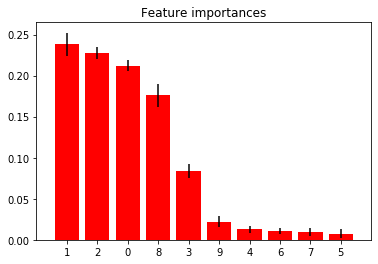

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
#División del dataset 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (11900, 10) (11900,)
Test set: (5100, 10) (5100,)


In [13]:
clasificador = NearestCentroid()
clasificador.fit(X_train,y_train)
y_pred = clasificador.predict(X_test)
clasificador.score(X_test,y_test)

0.5670588235294117

In [15]:
#knn

In [16]:
from sklearn.neighbors import KNeighborsClassifier


In [17]:
list_accuracy=[]
for i in range(3,200):
    clasificador = KNeighborsClassifier(i)
    clasificador.fit(X_train, y_train)
    yhat = clasificador.predict(X_test)
    resultado = accuracy_score(y_test, yhat)
    list_accuracy.append(resultado)


In [18]:
np.argmax(list_accuracy)

46

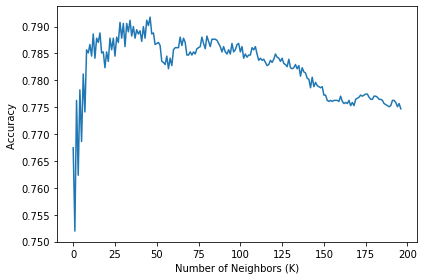

In [19]:
plt.plot(list_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [20]:
list_accuracy

[0.7674509803921569,
 0.7519607843137255,
 0.7762745098039215,
 0.7623529411764706,
 0.778235294117647,
 0.7686274509803922,
 0.7811764705882352,
 0.7741176470588236,
 0.7856862745098039,
 0.7850980392156863,
 0.7866666666666666,
 0.7845098039215687,
 0.7886274509803921,
 0.7841176470588235,
 0.787843137254902,
 0.7870588235294118,
 0.7888235294117647,
 0.7850980392156863,
 0.7852941176470588,
 0.7823529411764706,
 0.7852941176470588,
 0.7835294117647059,
 0.787843137254902,
 0.7856862745098039,
 0.787843137254902,
 0.7845098039215687,
 0.7880392156862746,
 0.7870588235294118,
 0.7907843137254902,
 0.787843137254902,
 0.7905882352941176,
 0.7862745098039216,
 0.7905882352941176,
 0.7890196078431373,
 0.7911764705882353,
 0.788235294117647,
 0.79,
 0.787843137254902,
 0.7894117647058824,
 0.7886274509803921,
 0.7892156862745098,
 0.7872549019607843,
 0.79,
 0.787843137254902,
 0.7911764705882353,
 0.7901960784313725,
 0.7917647058823529,
 0.7886274509803921,
 0.7888235294117647,
 0.7866

In [21]:
clasificador = KNeighborsClassifier(10)
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
yhat

array([1., 1., 1., ..., 0., 1., 1.])

In [22]:
accuracy_score(yhat,y_test)

0.7741176470588236

In [23]:
from sklearn.neighbors import RadiusNeighborsClassifier
clasificador = RadiusNeighborsClassifier(50)
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
yhat

array([1., 1., 1., ..., 1., 1., 1.])

# Clasificadores

Random Forest

In [24]:
kf = KFold(n_splits=10)# siempre se utiliza para todos los clasificadores, metodo de validacion siempre si 5 y 10 (n_splits)
kf.get_n_splits(X)
yhatFold=[]
listaX = []
listaY = []
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    X_trainEu3, X_testEu3 = X[train_index], X[test_index]
    y_trainEu3, y_testEu3 = y[train_index], y[test_index]
    
    clasificadorknn =  RandomForestClassifier() # solo esto cambia con otro clasificador 
    clasificadorknn.fit(X_trainEu3, y_trainEu3)# entrena
    yhat1 = clasificadorknn.predict(X_testEu3)# predice
    yhatFold.extend(yhat1)
    listaY.extend(y_testEu3) #Se utiliza para el clasification_report
    listaX.extend(X_testEu3)

print(classification_report(listaY, yhatFold, digits=3))

              precision    recall  f1-score   support

         0.0      0.635     0.460     0.534      4226
         1.0      0.836     0.913     0.873     12774

    accuracy                          0.800     17000
   macro avg      0.736     0.687     0.703     17000
weighted avg      0.786     0.800     0.789     17000



Naive Bayes

In [25]:
kf = KFold(n_splits=10)# siempre se utiliza para todos los clasificadores, metodo de validacion siempre si 5 y 10 (n_splits)
kf.get_n_splits(X)
yhatFold=[]
listaX = []
listaY = []
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    X_trainEu3, X_testEu3 = X[train_index], X[test_index]
    y_trainEu3, y_testEu3 = y[train_index], y[test_index]
    
    clasificadorknn =  GaussianNB() # solo esto cambia con otro clasificador 
    clasificadorknn.fit(X_trainEu3, y_trainEu3)# entrena
    yhat1 = clasificadorknn.predict(X_testEu3)# predice
    yhatFold.extend(yhat1)
    listaY.extend(y_testEu3) #Se utiliza para el clasification_report
    listaX.extend(X_testEu3)

print(classification_report(listaY, yhatFold, digits=3))

              precision    recall  f1-score   support

         0.0      0.488     0.341     0.402      4226
         1.0      0.802     0.881     0.840     12774

    accuracy                          0.747     17000
   macro avg      0.645     0.611     0.621     17000
weighted avg      0.724     0.747     0.731     17000



GridSearch

In [26]:
params={'n_estimators': [200,300],
        'criterion':['gini','entropy'],
        'max_depth': [5],# Maxima pofundidad del arbol
        'max_features': [None,3], # numero de features a considerar en cada split
        'max_leaf_nodes': [3,8], # maximo de nodos del arbol
        'min_impurity_decrease' : [0.02], # un nuevo nodo se hará si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [9] # El número mínimo de muestras necesarias para dividir un nodo interno
        }

In [27]:
# creamos la GridSeacrh
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
grid_solver = GridSearchCV(estimator = clf, # model to train
                   param_grid = params, # param_grid
                   scoring = "accuracy",
                   cv = 5,
                   n_jobs=-1)

model_result = grid_solver.fit(X_train,y_train)

In [28]:
model_result.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 3,
 'min_impurity_decrease': 0.02,
 'min_samples_split': 9,
 'n_estimators': 200}

In [29]:
model_result.best_score_

0.783781512605042

AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
kf = KFold(n_splits=10)# siempre se utiliza para todos los clasificadores, metodo de validacion siempre si 5 y 10 (n_splits)
kf.get_n_splits(X)
yhatFold=[]
listaX = []
listaY = []
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    X_trainEu3, X_testEu3 = X[train_index], X[test_index]
    y_trainEu3, y_testEu3 = y[train_index], y[test_index]
    
    addboost = AdaBoostClassifier(n_estimators=100 ) # solo esto cambia con otro clasificador 
    addboost.fit(X_trainEu3, y_trainEu3)# entrena
    yhat1 = addboost.predict(X_testEu3)# predice
    yhatFold.extend(yhat1)
    listaY.extend(y_testEu3) #Se utiliza para el clasification_report
    listaX.extend(X_testEu3)

print(classification_report(listaY, yhatFold, digits=3))

              precision    recall  f1-score   support

         0.0      0.676     0.431     0.526      4226
         1.0      0.832     0.932     0.879     12774

    accuracy                          0.807     17000
   macro avg      0.754     0.681     0.703     17000
weighted avg      0.793     0.807     0.791     17000



In [31]:
X.shape

(17000, 10)

Prediccion con addboost

In [33]:
y = df2["clase"]
df2 = df2.drop("clase",axis=1)
from sklearn.preprocessing import MinMaxScaler
transformador = MinMaxScaler().fit(df2)#entrenamos al transformador.
df777 = transformador.transform(df2)#transformamos el df2
df777 = pd.DataFrame(df777, columns = df2.columns)
df777.head()

,reward,income,difficulty,Año,web,email,social,mobile,age1,gender1
0,0.333333,0.777778,0.166667,0.8,0.0,1.0,0.0,1.0,0.686747,1.0
1,0.208333,0.444444,0.270833,1.0,1.0,1.0,0.0,1.0,0.602410,0.0
2,0.454545,0.381522,0.336364,0.8,1.0,1.0,0.0,1.0,0.530120,1.0
3,0.335000,0.255556,0.287500,1.0,1.0,1.0,0.0,1.0,0.566265,0.0
4,0.452632,0.644444,0.526316,1.0,1.0,1.0,0.0,1.0,0.457831,1.0


In [34]:
X = df777.values


In [35]:
from sklearn.ensemble import AdaBoostClassifier
kf = KFold(n_splits=10)# siempre se utiliza para todos los clasificadores, metodo de validacion siempre si 5 y 10 (n_splits)
kf.get_n_splits(X)
yhatFold=[]
listaX = []
listaY = []
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    X_trainEu3, X_testEu3 = X[train_index], X[test_index]
    y_trainEu3, y_testEu3 = y[train_index], y[test_index]
    
    addboost = AdaBoostClassifier(n_estimators=100 ) # solo esto cambia con otro clasificador 
    addboost.fit(X_trainEu3, y_trainEu3)# entrena
    yhat1 = addboost.predict(X_testEu3)# predice
    yhatFold.extend(yhat1)
    listaY.extend(y_testEu3) #Se utiliza para el clasification_report
    listaX.extend(X_testEu3)

print(classification_report(listaY, yhatFold, digits=3))

              precision    recall  f1-score   support

         0.0      0.676     0.431     0.526      4226
         1.0      0.832     0.932     0.879     12774

    accuracy                          0.807     17000
   macro avg      0.754     0.681     0.703     17000
weighted avg      0.793     0.807     0.791     17000



In [36]:
cliente=np.array([5,10000,2017,40,2,3,2,3,2,5])
norma = transformador.transform(cliente.reshape(1,-1))#paso la matriz anterior a 1,-1 para poder hacerlo,transformado escala cliente
norma


array([[5.000e+00, 1.000e+04, 2.017e+03, 4.000e+01, 2.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 5.000e+00]])

In [37]:
X.shape

(17000, 10)

In [38]:
y.shape

(17000,)

In [39]:
norma.shape

(1, 10)

In [40]:
addboost.fit(X, y)# entrena
yhat1 = addboost.predict(norma)#predice
yhat1#resultado

array([0.])

In [41]:
df777.columns#prueba del adaboost en el 66 comienza el bueno.

Index(['reward', 'income', 'difficulty', 'Año', 'web', 'email', 'social',
       'mobile', 'age1', 'gender1'],
      dtype='object')

In [66]:
dfnotransformado=df.drop("clase",axis=1)


In [67]:
dfnotransformado

,reward,income,difficulty,Año,web,email,social,mobile,age1,gender1
0,3.333333,100000.000000,3.333333,2017,0.0,1.0,0.0,1.0,75.0,1
1,2.083333,70000.000000,5.416667,2018,1.0,1.0,0.0,1.0,68.0,0
2,4.545455,64337.000755,6.727273,2017,1.0,1.0,0.0,1.0,62.0,1
3,3.350000,53000.000000,5.750000,2018,1.0,1.0,0.0,1.0,65.0,0
4,4.526316,88000.000000,10.526316,2018,1.0,1.0,0.0,1.0,56.0,1
...,...,...,...,...,...,...,...,...,...,...
16995,0.000000,88000.000000,0.000000,2016,0.0,0.0,0.0,0.0,55.0,1
16996,0.000000,34000.000000,0.000000,2017,0.0,0.0,0.0,0.0,66.0,1
16997,0.000000,35000.000000,0.000000,2017,0.0,0.0,0.0,0.0,72.0,1
16998,0.000000,70000.000000,0.000000,2015,0.0,0.0,0.0,0.0,91.0,0


In [68]:
from sklearn.preprocessing import MinMaxScaler
transformador = MinMaxScaler().fit(dfnotransformado)
dftransformado = transformador.transform(dfnotransformado)
dftransformado = pd.DataFrame(dftransformado, columns = dfnotransformado.columns)
dftransformado.head()

,reward,income,difficulty,Año,web,email,social,mobile,age1,gender1
0,0.333333,0.777778,0.166667,0.8,0.0,1.0,0.0,1.0,0.686747,1.0
1,0.208333,0.444444,0.270833,1.0,1.0,1.0,0.0,1.0,0.602410,0.0
2,0.454545,0.381522,0.336364,0.8,1.0,1.0,0.0,1.0,0.530120,1.0
3,0.335000,0.255556,0.287500,1.0,1.0,1.0,0.0,1.0,0.566265,0.0
4,0.452632,0.644444,0.526316,1.0,1.0,1.0,0.0,1.0,0.457831,1.0


In [71]:
reward = float(input("Ingrese la recompensa recibida: "))
income = float(input("Ingrese sus ingresos anuales "))
difficulty = float(input("Ingrese la cantidad monetaria con la que consiguio la oferta: "))
Año =float(input("Ingrese al año de creacion de su usuario: "))
web = float(input("Escribir: \"1\", de haber obtenido la oferta a traves de web o \"0\" en caso contrario: "))
email = float(input("Escribir: \"1\", de haber obtenido la oferta a traves de email o \"0\" en caso contrario: "))
social = float(input("Escribir: \"1\", de haber obtenido la oferta a traves de rrss o \"0\" en caso contrario: "))
mobile = float(input("Escribir: \"1\", de haber obtenido la oferta a traves de movil o \"0\" en caso contrario:" ))
age1 = float(input("Ingrese su edad: "))
gender1 = float(input("Ingresa su genero,usando \"1\"  para masculino \"0\" para femenino: "))



cliente=np.array([reward,income,difficulty,Año,web,email,social,mobile,age1,gender1])
clientet=transformador.transform(cliente.reshape(1,-1))#con esta linea el codigo nos permite meter los datos originales previos a la tranformacion

X=dftransformado.values
y=df.clase.values

addboost.fit(X, y)# entrena
yhat1 = addboost.predict(clientet)
yhat1[0]

if yhat1[0] == 0:
    print("Este cliente no usara la oferta reciba")
else:
    print("Este cliente usara la oferta reciba")

Ingrese la recompensa recibida: 3.333333
Ingrese sus ingresos anuales 100000.000000
Ingrese la cantidad monetaria con la que consiguio la oferta: 3.333333
Ingrese al año de creacion de su usuario: 2017
Escribir: "1", de haber obtenido la oferta a traves de web o "0" en caso contrario: 0.0
Escribir: "1", de haber obtenido la oferta a traves de email o "0" en caso contrario: 1.0
Escribir: "1", de haber obtenido la oferta a traves de rrss o "0" en caso contrario: 0.0
Escribir: "1", de haber obtenido la oferta a traves de movil o "0" en caso contrario:1.0
Ingrese su edad: 75.0
Ingresa su genero,usando "1"  para masculino "0" para femenino: 1.0
Este cliente usara la oferta reciba


GRAFICOS

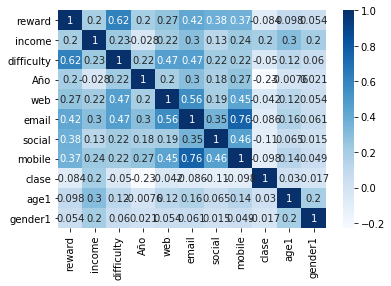

In [72]:
sns.heatmap(df[["reward","income","difficulty","Año","web","email","social","mobile","clase","age1","gender1"]].corr(), annot=True, cmap="Blues")

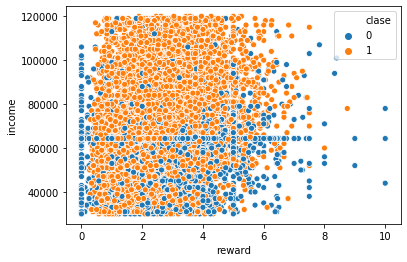

In [74]:
sns.scatterplot(data=df, x="reward", y="income", hue="clase")

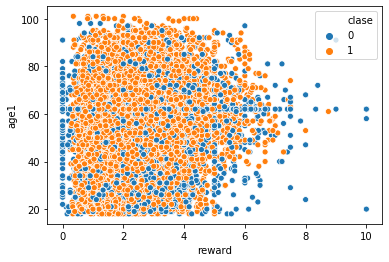

In [75]:
sns.scatterplot(data=df, x="reward", y="age1", hue="clase")

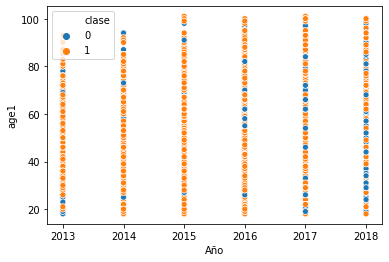

In [76]:
sns.scatterplot(data=df, x="Año", y="age1", hue="clase")

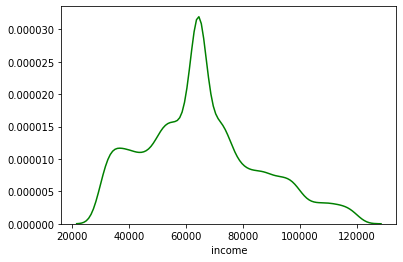

In [77]:
sns.distplot(df["income"], hist=False, color="green") #Histograma

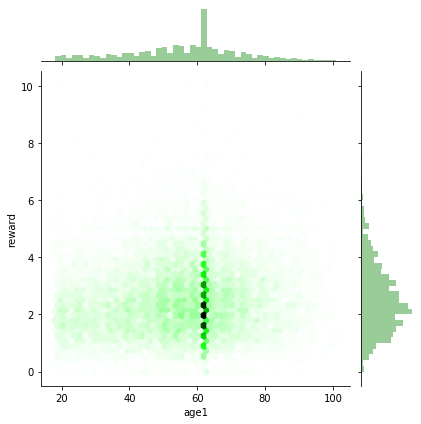

In [81]:
sns.jointplot(df.age1,df.reward,kind="hex",color="green")#'scatter', 'reg', 'resid', 'kde', or 'hex'
plt.show()

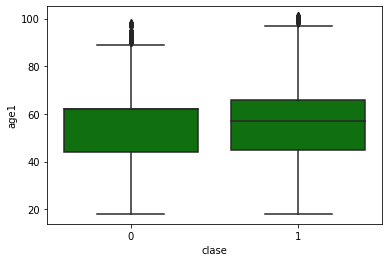

In [82]:
sns.boxplot(y="age1", x="clase", data=df,color="green")

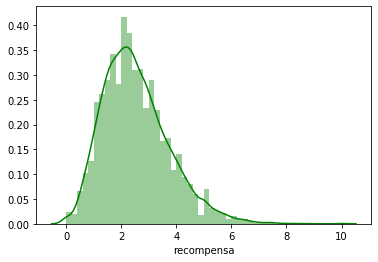

In [80]:
sns.distplot(df["reward"], axlabel="recompensa", color="green") #Histograma
plt.show()